In [149]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

In [150]:
data = []
labels = []

for root, dirs, files in os.walk("/content/iris-setosa"):
    for file in files:
        img = Image.open(f'/content/iris-setosa/{file}')
        data.append(np.asarray(img))
        labels.append(0)

for root, dirs, files in os.walk("/content/iris-versicolour"):
    for file in files:
        img = Image.open(f'/content/iris-versicolour/{file}')
        data.append(np.asarray(img))
        labels.append(1)


In [151]:
len(data)

335

In [152]:
from sklearn.utils import shuffle

In [153]:
data, labels = shuffle(data, labels)

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

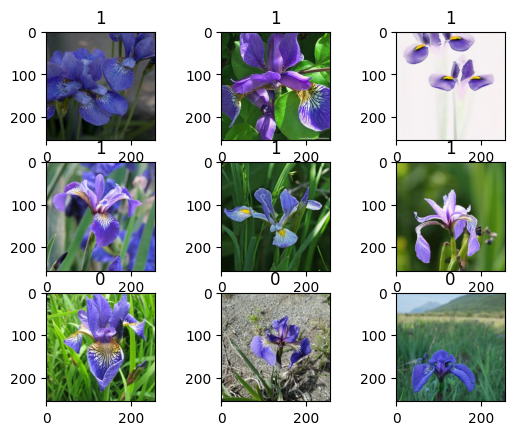

In [155]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.title(labels[i])
  plt.imshow(data[i])

In [156]:
X_train = data[:int(0.9 * len(data))]
X_test = data[int(0.9 * len(data)):]

In [157]:
y_train = labels[:int(0.9 * len(data))]
y_test = labels[int(0.9 * len(data)):]

In [158]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

301 301
34 34


In [159]:
IM_SIZE = 224
def resize_rescale(img):
  return tf.image.resize(img, (IM_SIZE, IM_SIZE)) / 255.0

In [160]:
X_train = list(map(resize_rescale, X_train))
X_test = list(map(resize_rescale, X_test))

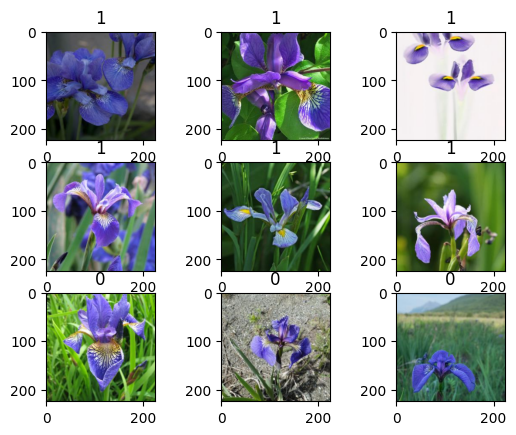

In [161]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.title(y_train[i])
  plt.imshow(X_train[i])

In [162]:
tf.math.reduce_max(X_train[0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.9341718>

In [163]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [164]:
model = Sequential([
    layers.InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2, strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

In [165]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

In [166]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [167]:
X_train.shape

(301, 224, 224, 3)

In [168]:
X_test.shape

(34, 224, 224, 3)

In [169]:
y_train.shape

(301,)

In [170]:
y_test.shape

(34,)

In [171]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_20 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_21 (Ba  (None, 109, 109, 64)      256       
 tchNormalization)                                               
                                                      

In [172]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
7/7 - 4s - loss: 1.1356 - accuracy: 0.6143 - val_loss: 0.6336 - val_accuracy: 0.6374 - 4s/epoch - 516ms/step
Epoch 2/30
7/7 - 1s - loss: 0.6042 - accuracy: 0.7000 - val_loss: 0.4798 - val_accuracy: 0.8242 - 680ms/epoch - 97ms/step
Epoch 3/30
7/7 - 1s - loss: 0.4299 - accuracy: 0.8333 - val_loss: 0.5276 - val_accuracy: 0.8132 - 696ms/epoch - 99ms/step
Epoch 4/30
7/7 - 1s - loss: 0.4032 - accuracy: 0.8000 - val_loss: 0.6255 - val_accuracy: 0.6923 - 716ms/epoch - 102ms/step
Epoch 5/30
7/7 - 1s - loss: 0.3022 - accuracy: 0.8905 - val_loss: 0.5223 - val_accuracy: 0.8242 - 721ms/epoch - 103ms/step
Epoch 6/30
7/7 - 1s - loss: 0.2273 - accuracy: 0.9238 - val_loss: 0.4693 - val_accuracy: 0.8132 - 689ms/epoch - 98ms/step
Epoch 7/30
7/7 - 1s - loss: 0.1943 - accuracy: 0.9476 - val_loss: 0.5545 - val_accuracy: 0.7912 - 594ms/epoch - 85ms/step
Epoch 8/30
7/7 - 1s - loss: 0.2097 - accuracy: 0.9190 - val_loss: 0.6434 - val_accuracy: 0.6484 - 604ms/epoch - 86ms/step
Epoch 9/30
7/7 - 1s - lo

In [173]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.5725 - accuracy: 0.7059


[0.5724539756774902, 0.7058823704719543]

In [174]:
pred = model.predict(X_test)
pred[:5]

2/2 [==============================] - 0s 16ms/step


array([[0.11386175, 0.8861382 ],
       [0.17720005, 0.8227999 ],
       [0.74266785, 0.25733212],
       [0.1902067 , 0.8097933 ],
       [0.5815991 , 0.41840082]], dtype=float32)

In [175]:
y_pred = []
for i in pred:
  y_pred.append(np.argmax(i))
  print(i)

[0.11386175 0.8861382 ]
[0.17720005 0.8227999 ]
[0.74266785 0.25733212]
[0.1902067 0.8097933]
[0.5815991  0.41840082]
[0.34159762 0.65840244]
[0.3773554 0.6226446]
[0.17592604 0.824074  ]
[0.7549634  0.24503662]
[0.12543741 0.87456256]
[0.2577819  0.74221814]
[0.03972951 0.96027046]
[0.09306237 0.9069376 ]
[0.7912162  0.20878376]
[0.10434869 0.89565134]
[0.42123455 0.57876545]
[0.04365293 0.9563471 ]
[0.04612863 0.95387137]
[0.29823467 0.70176536]
[0.14345564 0.8565443 ]
[0.2425575 0.7574425]
[0.07212948 0.9278705 ]
[0.01360084 0.9863992 ]
[0.63837564 0.3616244 ]
[0.19472104 0.80527896]
[0.37183908 0.62816095]
[0.18626137 0.81373864]
[0.6039905  0.39600947]
[0.19063342 0.8093666 ]
[0.27918822 0.7208118 ]
[0.27623627 0.72376376]
[0.17544325 0.8245567 ]
[0.13346715 0.86653286]
[0.5378889  0.46211115]


In [176]:
set(y_pred)

{0, 1}

In [177]:
len(y_pred)

34

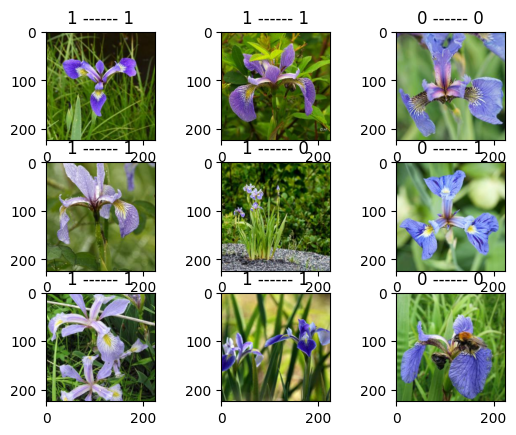

In [178]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.title(f'{y_test[i]} ------ {y_pred[i]}')
  plt.imshow(X_test[i])

In [179]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])